# Olympic Hero
### Problem Statement
The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.

We are using the Olympics dataset(scraped from https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table) , to look at some interesting statistics and then try to find out which country is the King of Olympic Games.

In [22]:
#Importing header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
#Path of the file
path = 'C:\\Users\\Hemant\\Downloads\\file (2).csv'

#Loading dataset
data = pd.read_csv(path)
data.rename({'Total':'Total_Medals'},axis = 'columns', inplace = True)
data.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [24]:
#Finding which is better season (Summer or Winter) on basis of medals
data['Better_Event'] = np.where(data['Total_Summer']>data['Total_Winter'], 'Summer',(np.where(data['Total_Summer']<data['Total_Winter'], 'Winter', 'Both')))
better_event = data['Better_Event'].value_counts(ascending = False).index[0]
print(better_event)

Summer


In [25]:
top_countries = data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]
top_countries.drop(index = 146 , axis = 0, inplace = True)
top_countries.tail()

,Country_Name,Total_Summer,Total_Winter,Total_Medals
141,Yugoslavia,83,4,87
142,Independent Olympic Participants,3,0,3
143,Zambia,2,0,2
144,Zimbabwe,8,0,8
145,Mixed team,17,0,17


In [26]:
def top_ten(df1, col1):
    country_list = []
    top_10 = df1.nlargest(10, col1)
    country_list = list(top_10['Country_Name'])
    return country_list

top_10_summer = top_ten(top_countries, 'Total_Summer')
top_10_winter = top_ten(top_countries, 'Total_Winter')
top_10 = top_ten(top_countries, 'Total_Medals')
print(top_10_summer)
print(top_10_winter)
print(top_10)

['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia']
['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia']
['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia']


In [27]:
common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print(common)

['Soviet Union', 'Sweden', 'Germany', 'United States']


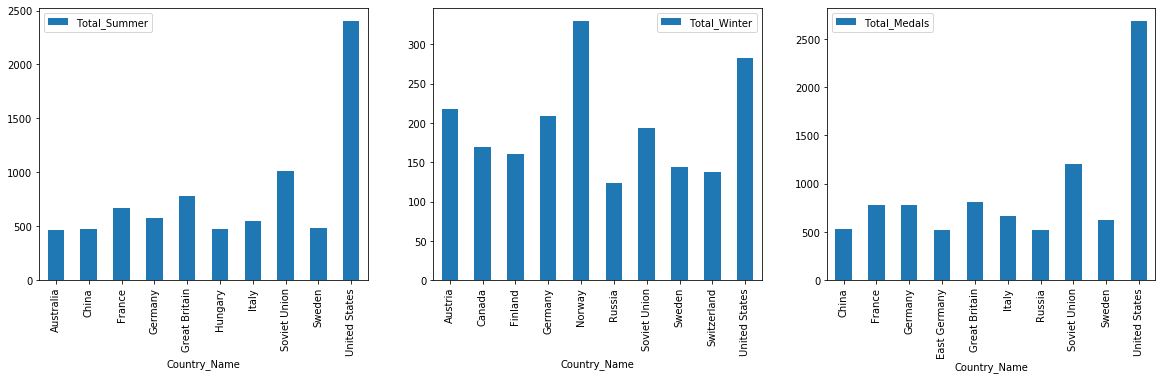

In [28]:
#Plotting Top 10
summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

fig ,(ax_1,ax_2,ax_3) = plt.subplots(1,3, figsize=(20,5))
summer_df.plot( x ='Country_Name', y = 'Total_Summer', kind = 'bar', ax = ax_1)
winter_df.plot( x ='Country_Name', y = 'Total_Winter', kind = 'bar', ax = ax_2)
top_df.plot( x ='Country_Name', y = 'Total_Medals', kind = 'bar', ax = ax_3)

In [29]:
#Top performing country for Summer (Gold) 
summer_df['Golden_Ratio'] = summer_df['Gold_Summer'] / summer_df['Total_Summer']
summer_max_ratio = summer_df['Golden_Ratio'].max()
summer_country_gold = summer_df.loc[summer_df['Golden_Ratio'] == summer_max_ratio, 'Country_Name'].iloc[0]
print(summer_country_gold)

China


In [30]:
#Top performing country for Winter (Gold) 
winter_df['Golden_Ratio'] = winter_df['Gold_Winter'] / winter_df['Total_Winter']
winter_max_ratio = winter_df['Golden_Ratio'].max()
winter_country_gold = winter_df.loc[winter_df['Golden_Ratio'] == winter_max_ratio, 'Country_Name'].iloc[0]
print(winter_country_gold)

Soviet Union


In [31]:
#Top performing country from Summer and Winter (Gold) 
top_df['Golden_Ratio'] = top_df['Gold_Total'] / top_df['Total_Medals']
top_max_ratio = top_df['Golden_Ratio'].max()
top_country_gold = top_df.loc[top_df['Golden_Ratio']== top_max_ratio, 'Country_Name'].iloc[0]
print(top_country_gold)

China


In [32]:
data.tail(1)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
146,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Summer


In [33]:
#Dropping Last Row containing 'Totals'
data_1 = data.drop(data.tail(1).index)

In [34]:
#Best in the world
data_1['Total_Points'] = (3* data_1['Gold_Total']) + (2*data_1['Silver_Total']) + (data_1['Bronze_Total'])

most_points = data_1['Total_Points'].max()
best_country = data_1.loc[data_1['Total_Points']== most_points, 'Country_Name'].iloc[0]
print(best_country)

United States


In [35]:
#Filtering for the best country
best = data[data['Country_Name']== best_country]
best = best[['Gold_Total','Silver_Total','Bronze_Total']]
print(type(best))
print(best)

<class 'pandas.core.frame.DataFrame'>
     Gold_Total  Silver_Total  Bronze_Total
135        1072           859           750


(array([0]), <a list of 1 Text xticklabel objects>)

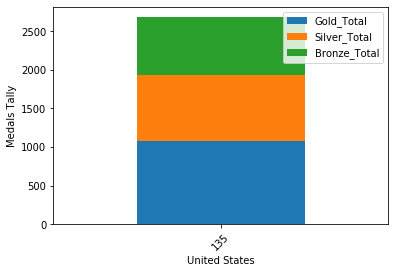

In [36]:
#Plotting Bar for best country
best.plot.bar(stacked = True)
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation = 45)

Concepts:

    Dataframe operations
    Conditional statement and loops
    List operations
    Bar Plotting
    Mathematical operations